In [41]:
## 导入依赖库
# NumPy 是一个核心的 Python 库，为科学计算提供了强大的多维数组对象（`ndarray`）和一系列处理这些数组的高级数学函数。
import numpy as np
# Matplotlib 是一个功能强大的 Python 绘图库，它提供了一个广泛的工具集，用于创建各种静态、动态和交互式的数据可视化图表。
import matplotlib.pyplot as plt
# CV2 是一个广泛使用的计算机视觉库，它提供了数百个函数来处理图像和视频，例如读取、显示、处理以及进行物体识别等操作。
import cv2
# TensorFlow 是谷歌公司开发的一个强大的开源机器学习框架，它能让开发者轻松地构建和训练各种复杂的机器学习模型，从简单的神经网络到大规模的深度学习系统。
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# Pickle 是 Python 的一个内置模块，用于将 Python 对象（如列表、字典等）序列化为字节流，以便能够轻松地保存到文件或在网络上传输。
import pickle
import random
# Pandas 是一个基于 NumPy 的 Python 数据分析库，它提供了一个高效的 `DataFrame` 对象，使得数据清洗、处理和分析变得非常简单。
import pandas as pd

In [42]:
# print the versions of imported libraries
print("numpy version: ", np.__version__)
print("keras version: ", keras.__version__)
print("opencv version: ", cv2.__version__)
print("pandas version: ", pd.__version__)

numpy version:  2.0.2
keras version:  3.10.0
opencv version:  4.12.0
pandas version:  2.2.2


In [43]:
# 设置伪随机数列的种子（一个特定的种子将决定特定的随机数列）
np.random.seed(0)

## Impoting Data

In [5]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 117.80 MiB | 10.89 MiB/s, done.
Updating files: 100% (4/4), done.


In [44]:
# 解压缩并加载数据到变量中以方便使用
with open('german-traffic-signs/train.p','rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
    test_data = pickle.load(f)

In [45]:
# 构造训练集、验证集、测试集
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [46]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [47]:
# 检查数据的维度
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the image is not 32*32*3"

## Data Visualisation

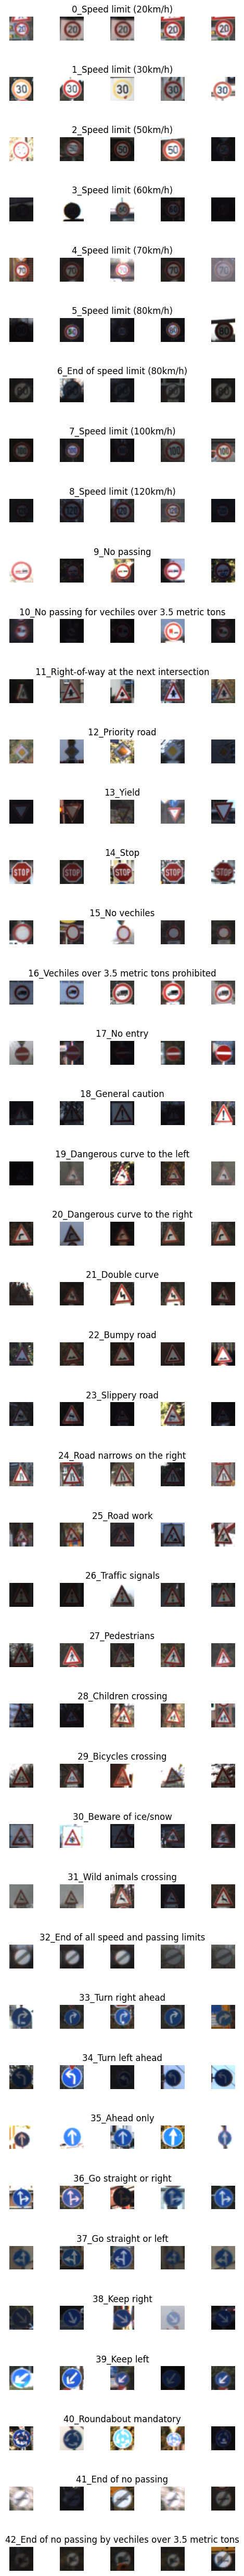

In [48]:
# 加载标签对应的名称数据，用于可视化
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected)-1)), :, :], cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "_" + row["SignName"])
            num_of_samples.append(len(x_selected))



[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

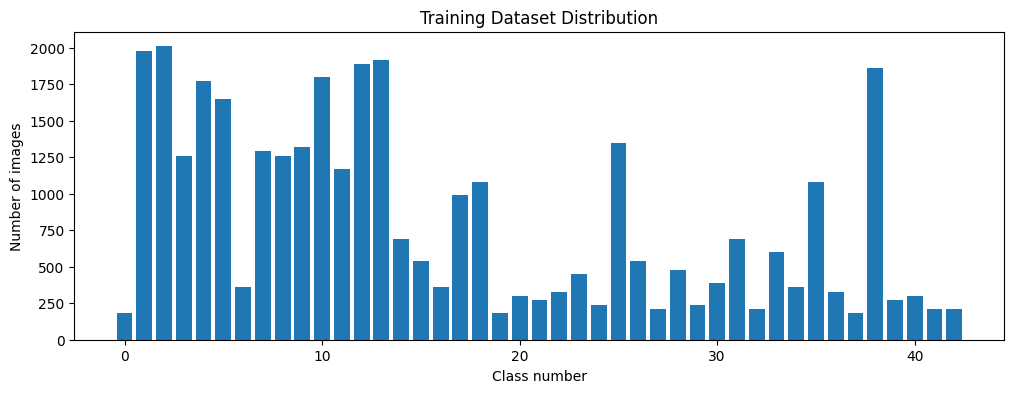

In [49]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Training Dataset Distribution")
plt.xlabel("Class number")
plt.ylabel("Number of images")

## Data Preprocessing

(32, 32, 3)
36


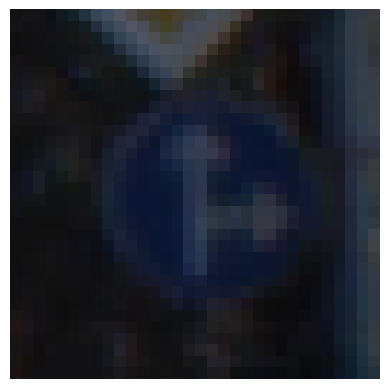

In [50]:
# 可视化训练集中的某个图片
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

In [51]:
# 定义转化原始图片为灰度的函数
def grayscale(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    return image

(32, 32)


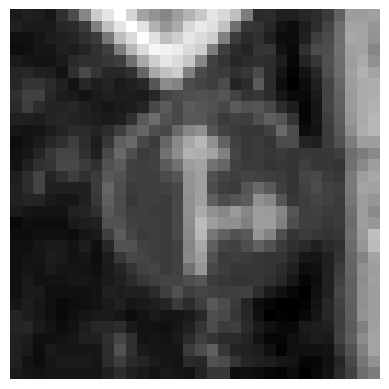

In [52]:
# 将图片数据转化为灰度图
img = grayscale(X_train[1000])
plt.imshow(img, cmap = 'gray')
print(img.shape)

In [53]:
# 直方图均衡化，可以简单理解为让图片“变亮"
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

(32, 32)


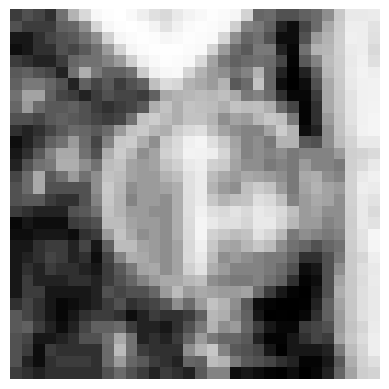

In [54]:
img = equalize(img)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
print(img.shape)

In [55]:
# 前处理
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

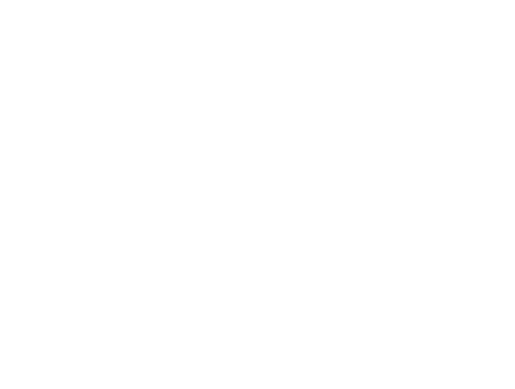

In [56]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

In [57]:
# 也是前处理的其中一步，将数据的大小整理一下
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [58]:
# 对训练数据进行变换，扩展
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range = 0.1,
                  height_shift_range = 0.1,
                   zoom_range = 0.2,
                  shear_range = 0.1,
                  rotation_range = 10)

datagen.fit(X_train)

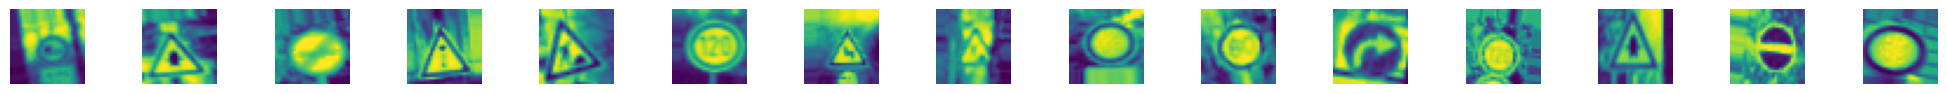

In [59]:
# 将数据处理为批次
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize = (20, 5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [60]:
# 将整数标签转换为二进制向量
# 比如，某个样本的标签为“2"，数据集中总的类别数量是43，那么标签“2"应该转换为：
# [0,0,1,0,0,0,0,0,0, ... ,0]
#   ↑第2个元素的值为1表示“2"。（同理，如果第3个元素的值为1，则表示“3"）
# 这样的表示方法成为“独热编码"
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

## Neural Network

In [61]:
# 定位神经网络的形状
def neural_model():
    model = Sequential()
    # 第一层，卷积层，核大小为5x5
    model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
    # 第二层，卷积层，核大小为5x5
    model.add(Conv2D(60, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
    # 第三层，最大池化层，核大小为2x2
    model.add(MaxPooling2D(pool_size = (2,2)))
    # 第四层，卷积层，核大小为3x3
    model.add(Conv2D(30, (3, 3), activation = 'relu'))
    # 第五层，卷积层，核大小为3x3
    model.add(Conv2D(30, (3, 3), activation = 'relu'))
    # 第六层，最大池化层，核大小为2x2
    model.add(MaxPooling2D(pool_size = (2, 2)))

    #model.add(Dropout(0.5))
    # 把张量拆开为1维向量
    model.add(Flatten())
    # 第七层，全链接层
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    # 第八层，输出层
    model.add(Dense(num_classes, activation = 'softmax'))
    # 使用多分类交叉熵作为考核指标评估训练过程
    model.compile(Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [62]:
model = neural_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


In [63]:
# 开始训练
history = model.fit(datagen.flow(X_train, y_train, batch_size = 50), steps_per_epoch = 2000, epochs = 10, validation_data =(X_val, y_val), shuffle = 1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 696/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.2829 - loss: 2.6374

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4283 - loss: 2.0629 - val_accuracy: 0.9068 - val_loss: 0.3212
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8255 - loss: 0.5635 - val_accuracy: 0.9408 - val_loss: 0.1679
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8941 - loss: 0.3387 - val_accuracy: 0.9694 - val_loss: 0.1119
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9212 - loss: 0.2553 - val_accuracy: 0.9705 - val_loss: 0.0890
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9340 - loss: 0.2124 - val_accuracy: 0.9746 - val_loss: 0.0759
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9438 - loss: 0.1807 - val_accuracy: 0.9850 - val_loss: 0.0539
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9480 - loss: 0.1642 - val_accuracy: 0.9878 - val_loss: 0.0470
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9562 - loss: 0.1433 - val

Text(0.5, 0, 'epoch')

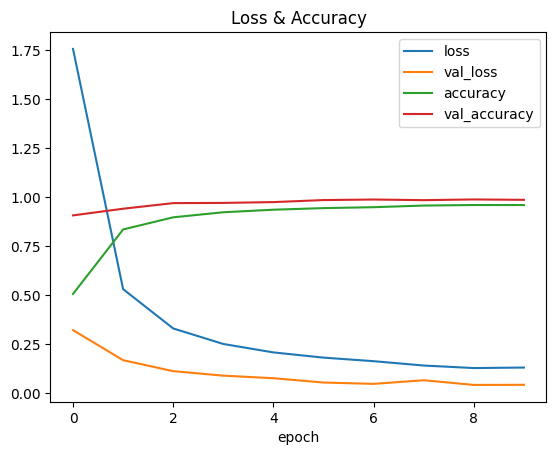

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.title('Loss & Accuracy')
plt.xlabel('epoch')

In [65]:
# 训练结束之后，评估训练结果
score = model.evaluate(X_test, y_test, verbose = 1)
print('Test Score', score[0])
print('Test Accuracy', score[1])

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9656 - loss: 0.1271
Test Score 0.11762101203203201
Test Accuracy 0.9673792719841003


## Testing

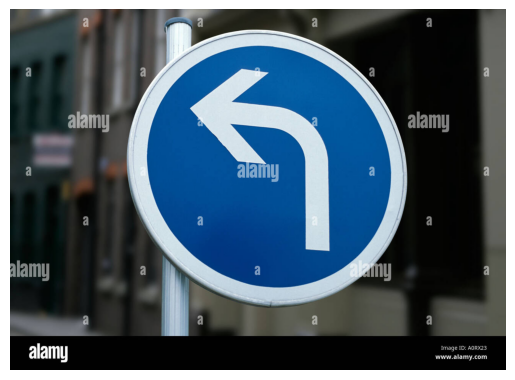

In [66]:
# 训练好的模型拿来测试一下
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
image = Image.open(r.raw)
plt.axis('off')
plt.imshow(image, cmap=plt.get_cmap('gray'))

(32, 32)


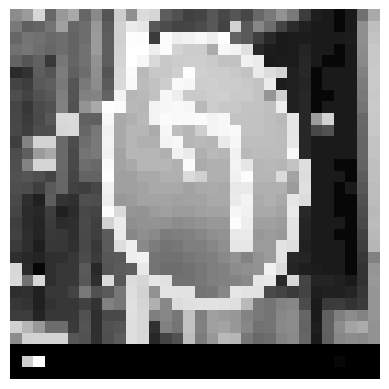

In [67]:
# 测试前对数据进行处理
img = np.asarray(image)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [68]:
# 让模型进行预测
predictions = model.predict(img)

predicted_class = np.argmax(predictions, axis=1)

prediction = str(predicted_class[0])
print("predicted sign: "+ prediction )

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
predicted sign: 34


predicted sign: 34
predicted sign: Turn left ahead


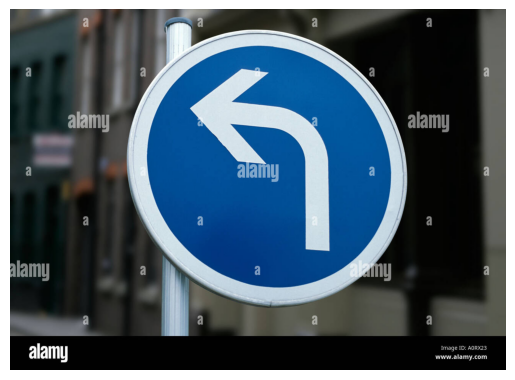

In [69]:
# 进行结果的可视化
pred = int(prediction)
plt.imshow(image)
plt.axis('off')

for num, name in data.items():
  name = name.values
  print("predicted sign: "+ str(name[pred]))
